In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


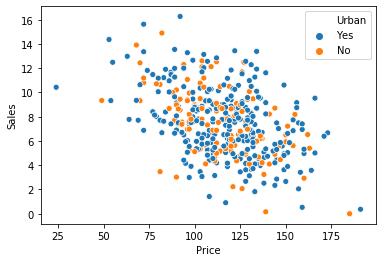

In [3]:
sns.scatterplot(x=df['Price'],y=df['Sales'], hue= df['Urban'])

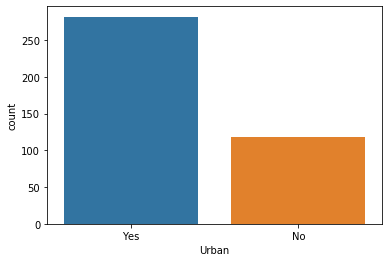

In [4]:
sns.countplot(x=df['Urban'],data=df)

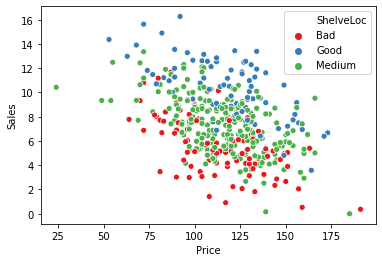

In [5]:
sns.scatterplot(x=df['Price'],y=df['Sales'], hue=df['ShelveLoc'], palette= 'Set1')

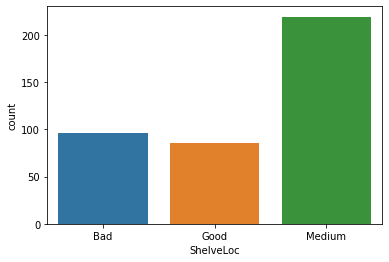

In [6]:
sns.countplot(x=df['ShelveLoc'], data=df)

In [7]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [8]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [9]:
Column_names = ['CompPrice','Income','Advertising','Population','Price',
               'ShelveLoc','Age','Education','Urban','US']

In [10]:

df['Target_Sales'] = '>=10'
df.loc[df['Sales']>=10 , 'Target_Sales'] = 'High Sales'
df.loc[df['Sales']<10 , 'Target_Sales'] = 'Low Sales'


In [11]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Target_Sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Low Sales
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High Sales
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High Sales
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low Sales
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low Sales


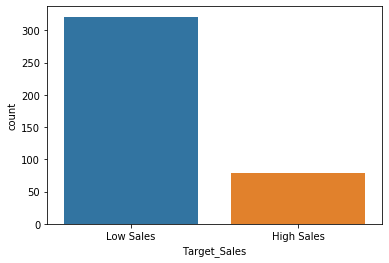

In [12]:
sns.countplot(x=df['Target_Sales'], data=df)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
Le = LabelEncoder()

In [15]:
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = Le.fit_transform(df[column_name])
    else:
        pass
    

In [16]:
df['ShelveLoc'].dtype

dtype('int32')

In [17]:
df['Target_Sales'] = '>=10'
df.loc[df['Sales']>=9 , 'Target_Sales'] = 'High Sales'
df.loc[df['Sales']<9, 'Target_Sales'] = 'Low Sales'

In [18]:
# Splitting the data into X and Y variable

X= df.iloc[:,1:11]
X

Y= df.iloc[:,11]
Y

0      High Sales
1      High Sales
2      High Sales
3       Low Sales
4       Low Sales
          ...    
395    High Sales
396     Low Sales
397     Low Sales
398     Low Sales
399    High Sales
Name: Target_Sales, Length: 400, dtype: object

In [19]:
# Splitting the data into Train and Test Datasets

from sklearn.model_selection import train_test_split


In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [25]:
# fitting and predicting the model

from sklearn.tree import DecisionTreeClassifier

In [26]:
Classifier = DecisionTreeClassifier(criterion='gini')

In [27]:
Classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
Xpred = Classifier.predict(X_test)

In [29]:
# find the accuracy of the data

from sklearn.metrics import confusion_matrix, accuracy_score

In [30]:
conf_mat = confusion_matrix(Xpred,y_test)
conf_mat

array([[13, 15],
       [16, 76]], dtype=int64)

In [31]:
acc = accuracy_score(Xpred,y_test)*100
acc

74.16666666666667

In [32]:
# Tuning the data

Classifier = DecisionTreeClassifier(criterion='gini', min_samples_split=50)

In [33]:
Classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
Xpred = Classifier.predict(X_test)

In [35]:
conf_mat = confusion_matrix(Xpred,y_test)
conf_mat

array([[14, 12],
       [15, 79]], dtype=int64)

In [36]:
acc = accuracy_score(Xpred,y_test)*100

In [37]:
acc

77.5

In [82]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


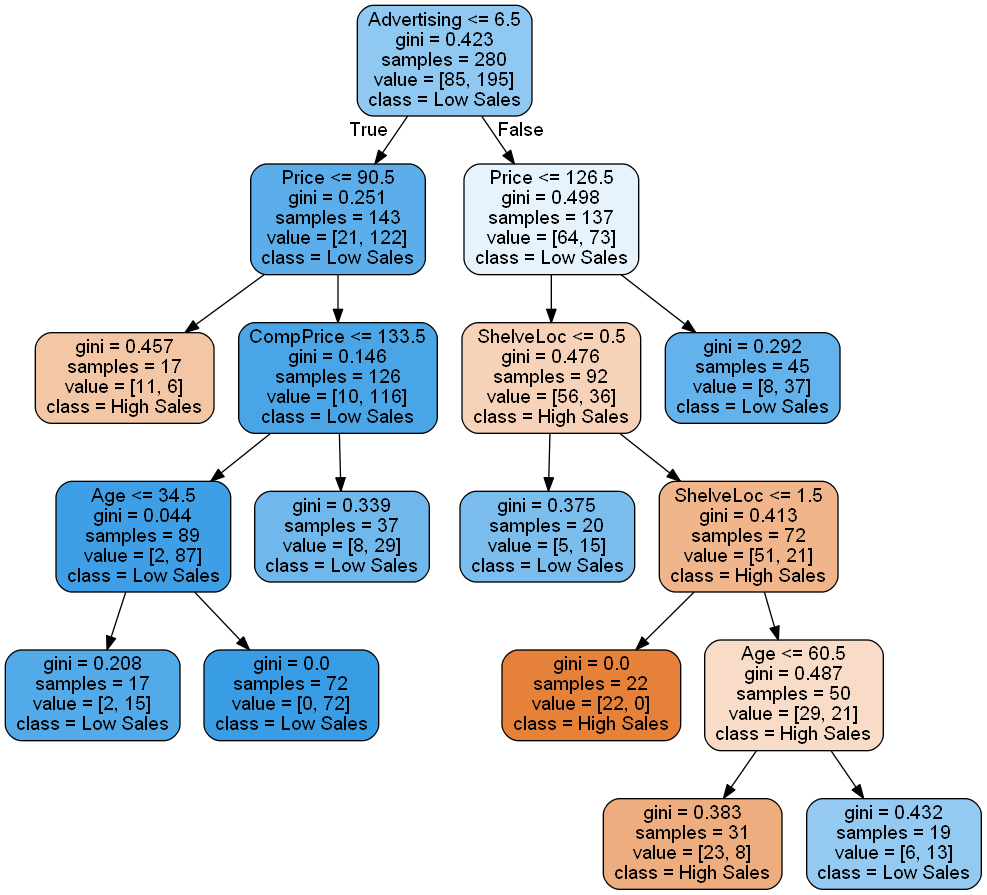

In [38]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(Classifier, out_file=dot_data, 
               filled=True, rounded=True,
               special_characters=False, feature_names = Column_names, class_names=['High Sales','Low Sales'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())